# TOC:
- [Description](#1)
- [Loading data](#2)
- [Data inspection](#3)  
     - [Duplicates](#4)
     - [Null values](#5)
     - [24 weather stations](#6)
     - [Unique 2 element tags (TMAX and TMIN)](#7)
     - [Datetime series](#8)
     - [Dtypes](#9)
     - [Convert temperatures from tenth Celcius to Celcius](#10)
     - [Describe variables](#11)
- [Data preparation](#12)
- [Plot](#13)

# Description <a class="anchor" id="1"></a>
 
Weather patterns over long periods can be clearly appreciated on plots and graphs.

A dataset contains daily maximum and minimum (high-low) temperatures corresponding to 24 weather stations near Ann Arbor, Michigan, United States.

A plot showing temperatures registered in 2015 breaking the previous ten year high-low records (2005-2014).

The dataset comes from The National Centers for Environmental Information (NCEI).

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.simplefilter("ignore")

# Loading data <a class="anchor" id="2"></a>

In [2]:
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
display(df.head())
print(df.shape)
df.info()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


(165085, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


# Data inspection <a class="anchor" id="3"></a>

## Duplicates <a class="anchor" id="4"></a>

In [3]:
print(df[df.duplicated()].shape)

(0, 4)


## Null values <a class="anchor" id="5"></a>

In [4]:
print(df.isnull().values.any())

False


## Unique 24 weather stations <a class="anchor" id="6"></a>

In [5]:
print(df.ID.unique())
print(len(df.ID.unique()))

['USW00094889' 'USC00208972' 'USC00200032' 'USC00205563' 'USC00200230'
 'USW00014833' 'USC00207308' 'USC00203712' 'USW00004848' 'USC00200220'
 'USC00205822' 'USC00200842' 'USC00205450' 'USC00201250' 'USC00207320'
 'USC00200228' 'USC00202308' 'USW00014853' 'USC00205050' 'USC00208202'
 'USC00208080' 'USC00207312' 'USC00205451' 'USC00201502']
24


## Unique 2 element tags (TMAX and TMIN) <a class="anchor" id="7"></a>

In [6]:
print(df.Element.unique())

['TMAX' 'TMIN']


## Datetime series <a class="anchor" id="8"></a>

In [7]:
#Converts dates to datetime
df['Date']=pd.to_datetime(df['Date'])

#creates a new column with day of year values
df['Day'] = df['Date'].dt.dayofyear

#drops 02-29 observations
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

#splits leap and nonleap years
df_leap = df[df['Date'].dt.year.isin([2008,2012])]
print(df_leap.shape)
df_nonleap = df[~(df['Date'].dt.year.isin([2008,2012]))]
print(df_nonleap.shape)

#offests a day on leap years after 02-29
df_leap['Day'] = df_leap['Day'].apply(lambda x: x-1 if x >=60 else x)

#concatenates leap and nonloeap years
df = pd.concat([df_leap, df_nonleap], axis = 0)
print(df.shape)

(31033, 5)
(133969, 5)
(165002, 5)


## Dtypes <a class="anchor" id="9"></a>

In [8]:
print(df.dtypes)

ID                    object
Date          datetime64[ns]
Element               object
Data_Value             int64
Day                    int64
dtype: object


## Convert temperatures from tenth Celcius to Celcius <a class="anchor" id="10"></a>

In [9]:
df['Data_Value']=df['Data_Value'] * .1

## Describe variables <a class="anchor" id="11"></a>

In [10]:
display(df.describe()) #Numerical dtypes
display(df.describe(include=[object])) #Object dtypes

,Data_Value,Day
count,165002.000000,165002.000000
mean,9.547632,183.193622
std,12.351344,105.337504
min,-34.300000,1.000000
25%,0.000000,92.000000
50%,9.400000,184.000000
75%,18.900000,274.000000
max,40.600000,365.000000


,ID,Element
count,165002,165002
unique,24,2
top,USC00200228,TMAX
freq,8029,83020


# Data preparation <a class="anchor" id="12"></a>

In [11]:
#Splits 2 datasets for years 2005-2014 and 2015
df_2015 = df[df['Date'].dt.year == 2015]
df = df[df['Date'].dt.year.between(2005,2014)]

In [12]:
# Aggregate 10-years records in a 365 days time series
df_max = df[df['Element']=='TMAX'].pivot_table(['Data_Value'], index="Day", aggfunc=max)
df_min = df[df['Element']=='TMIN'].pivot_table(['Data_Value'], index="Day", aggfunc=min)

In [13]:
# Aggregate 1 year records in a a 365 days time series
df_2015_max = df_2015[df_2015['Element']=='TMAX'].pivot_table(['Data_Value'], index="Day", aggfunc=max)
df_2015_min = df_2015[df_2015['Element']=='TMIN'].pivot_table(['Data_Value'], index="Day", aggfunc=min)

In [14]:
# Find days were 10-year records are broken
tmax = df_2015_max[df_2015_max['Data_Value'] > df_max['Data_Value']]
tmin = df_2015_min[df_2015_min['Data_Value'] < df_min['Data_Value']]

# Plot <a class="anchor" id="13"></a>

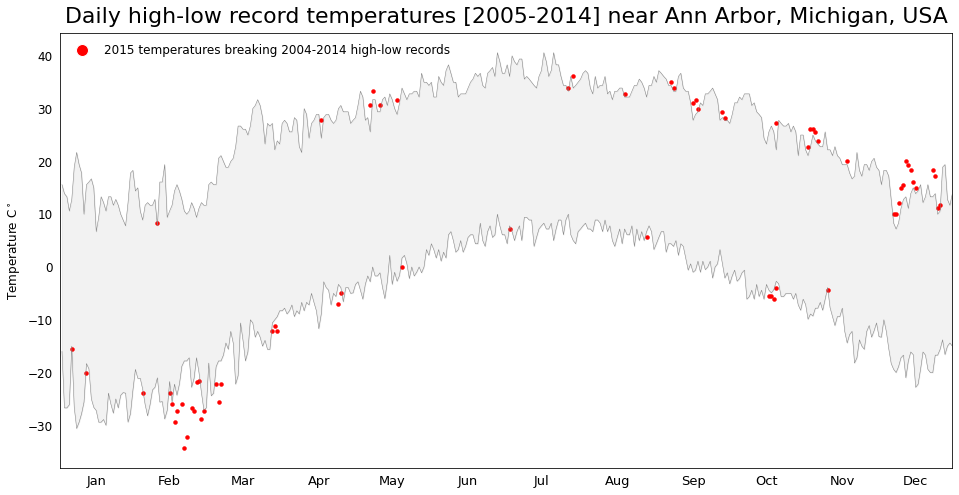

In [17]:
fig, ax = plt.subplots(figsize=(16,8))

days = list(range(1,366))
df_max.plot(kind = 'line', ax=ax, linewidth = 0.5, color = 'grey')
df_min.plot(kind = 'line', ax=ax, linewidth = 0.5, color = 'grey')
ax.fill_between(days, df_max.Data_Value, df_min.Data_Value, alpha = 0.1, color='grey')
plt.scatter(tmax.index, tmax.Data_Value, s=15, c='red', alpha = 1, lw=0.5)
plt.scatter(tmin.index, tmin.Data_Value, s=15, c='red', alpha = 1, lw=0.5)

#ax.spines.right.set_visible(False)
#ax.spines.top.set_visible(False)

plt.xlabel('')
plt.ylabel('Temperature C$^\circ$', fontsize = 12)

#legend settings
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='2015 temperatures breaking 2004-2014 high-low records',
                          markerfacecolor='r', markersize=12)]
                          
plt.legend(handles=legend_elements, loc=2, fontsize=12, frameon = False)

plt.title("Daily high-low record temperatures [2005-2014] near Ann Arbor, Michigan, USA", fontsize = 22, pad=10)
plt.tick_params(top=False, bottom=False, left=False, right=False)

month_starts = [15,45,75,106,136,167,197,228,259,289,320,350]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 
plt.gca().set_xticks(month_starts)
plt.gca().set_xticklabels(month_names)

plt.tick_params(axis='x', which='major', labelsize=13)
plt.tick_params(axis='y', which='major', labelsize=12)

plt.xlim([0, 365])

plt.show();

In [38]:
plt.savefig('plot.png', dpi=300, bbox_inches='tight')